In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

 Sales & Customer Forecasting

Forecast overall sales and new customer acquisition for the next 6 months.
Identify seasonality and trend patterns to anticipate peak periods.


In [38]:
customers = pd.read_csv("/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/customers.csv")
customers
orders = pd.read_csv("/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/order_items.csv")
orders

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [39]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [40]:
orders.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [41]:
orders.duplicated().sum()

np.int64(0)

In [42]:
orders.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [43]:
orders.duplicated().sum()

np.int64(0)

In [44]:
orders.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

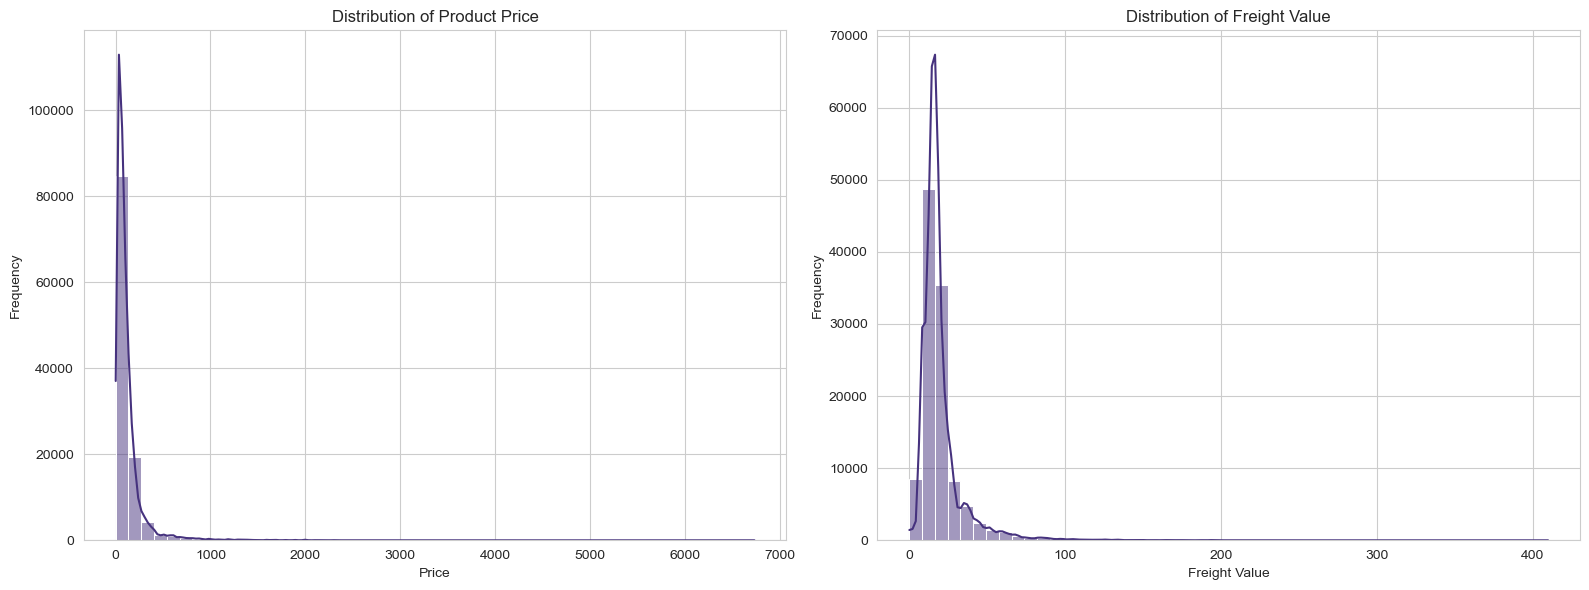

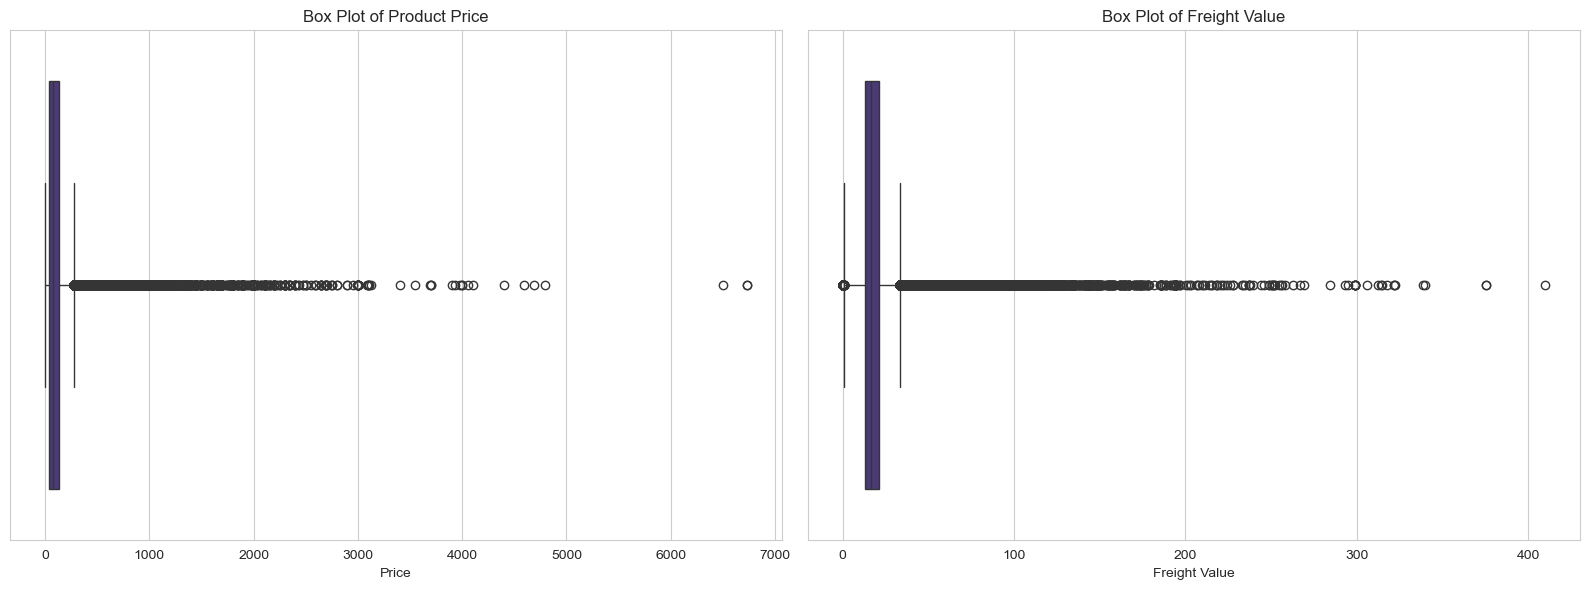

In [45]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the distribution of 'price'
sns.histplot(orders['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Product Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot the distribution of 'freight_value'
sns.histplot(orders['freight_value'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Freight Value')
axes[1].set_xlabel('Freight Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()



fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for 'price'
sns.boxplot(x=orders['price'], ax=axes[0])
axes[0].set_title('Box Plot of Product Price')
axes[0].set_xlabel('Price')

# Box plot for 'freight_value'
sns.boxplot(x=orders['freight_value'], ax=axes[1])
axes[1].set_title('Box Plot of Freight Value')
axes[1].set_xlabel('Freight Value')

plt.tight_layout()



/var/folders/2w/bcx9j7gn7mz2sytbgnx128kw0000gn/T/ipykernel_33364/19184210.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = full_df.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='M'))['payment_value'].sum().reset_index()
/var/folders/2w/bcx9j7gn7mz2sytbgnx128kw0000gn/T/ipykernel_33364/19184210.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months_sales = pd.date_range(start=last_month, periods=7, freq='M')[1:]
/var/folders/2w/bcx9j7gn7mz2sytbgnx128kw0000gn/T/ipykernel_33364/19184210.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_new_customers = new_customers.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='M'))['customer_unique_id'].nunique().reset_index()
/var/folders/2w/bcx9j7gn7mz2sytbgnx128kw0000gn/T/ipykernel_33364/19184210.py:72: FutureWarning

Sales Forecast for the next 6 months:
       month  forecasted_sales
0 2018-11-30      9.112818e+05
1 2018-12-31      9.102661e+05
2 2019-01-31      1.311298e+06
3 2019-02-28      1.310283e+06
4 2019-03-31      1.309267e+06
5 2019-04-30      1.308251e+06

New Customer Acquisition Forecast for the next 6 months:
       month  forecasted_new_customers
0 2018-11-30               5424.070017
1 2018-12-31               5411.541765
2 2019-01-31               7865.425354
3 2019-02-28               7852.897102
4 2019-03-31               7840.368850
5 2019-04-30               7827.840599


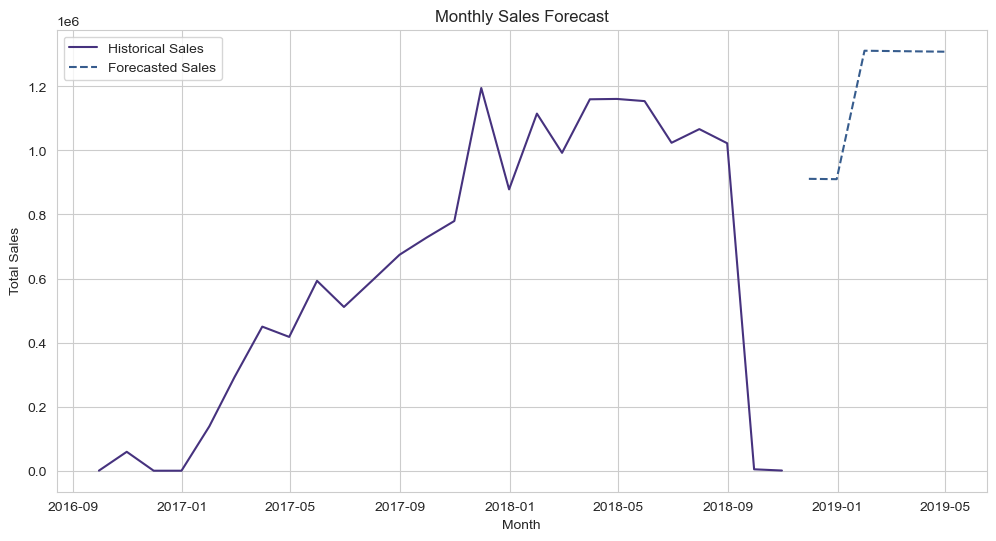

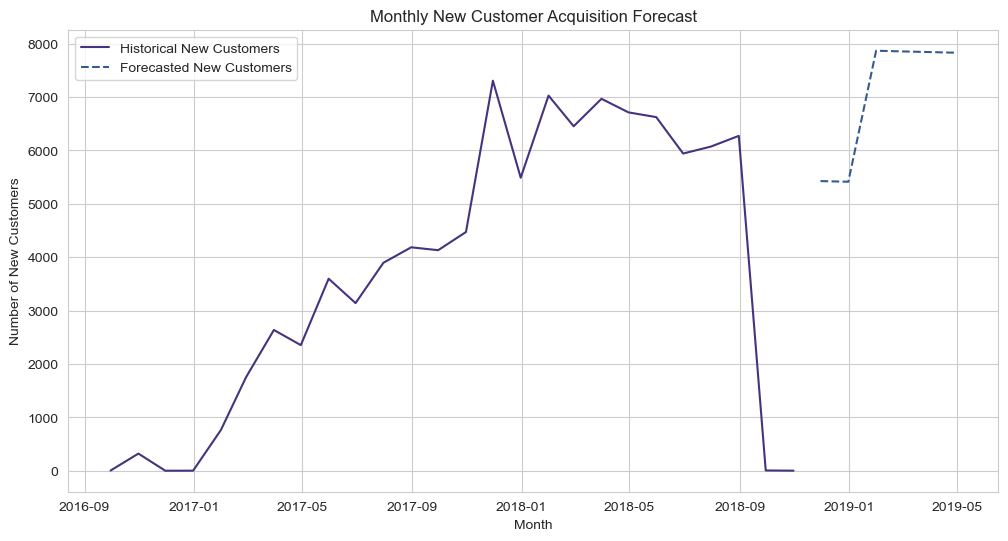

In [46]:

from sklearn.linear_model import LinearRegression


try:
    orders_df = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/orders.csv')
    customers_df = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/customers.csv')
    payments_df = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/payments.csv')
except FileNotFoundError as e:
    print(e)
    # Handle error, maybe by notifying the user to upload the files.
    exit()


# Merge dataframes
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id')
full_df = pd.merge(orders_customers_df, payments_df, on='order_id')

# Convert to datetime
full_df['order_purchase_timestamp'] = pd.to_datetime(full_df['order_purchase_timestamp'])

# Sales Forecasting

# Aggregate sales to monthly level
monthly_sales = full_df.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='M'))['payment_value'].sum().reset_index()
monthly_sales.rename(columns={'order_purchase_timestamp': 'month', 'payment_value': 'total_sales'}, inplace=True)

# Create features for linear regression
monthly_sales['time_index'] = np.arange(len(monthly_sales))
monthly_sales['month_of_year'] = monthly_sales['month'].dt.month

# Prepare data for modeling
X_sales = monthly_sales[['time_index', 'month_of_year']]
y_sales = monthly_sales['total_sales']

# Train the linear regression model
sales_model = LinearRegression()
sales_model.fit(X_sales, y_sales)

# Forecast for the next 6 months
last_month = monthly_sales['month'].max()
future_months_sales = pd.date_range(start=last_month, periods=7, freq='M')[1:]
future_sales_df = pd.DataFrame({'month': future_months_sales})
future_sales_df['time_index'] = np.arange(len(monthly_sales), len(monthly_sales) + 6)
future_sales_df['month_of_year'] = future_sales_df['month'].dt.month
future_sales_df['forecasted_sales'] = sales_model.predict(future_sales_df[['time_index', 'month_of_year']])








# New Customer Acquisition Forecasting 

# Identify first purchase date for each customer
full_df['first_purchase'] = full_df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')
new_customers = full_df[full_df['order_purchase_timestamp'] == full_df['first_purchase']]

# Aggregate new customers to monthly level
monthly_new_customers = new_customers.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='M'))['customer_unique_id'].nunique().reset_index()
monthly_new_customers.rename(columns={'order_purchase_timestamp': 'month', 'customer_unique_id': 'new_customers'}, inplace=True)

# Create features for linear regression
monthly_new_customers['time_index'] = np.arange(len(monthly_new_customers))
monthly_new_customers['month_of_year'] = monthly_new_customers['month'].dt.month

# Prepare data for modeling
X_customers = monthly_new_customers[['time_index', 'month_of_year']]
y_customers = monthly_new_customers['new_customers']

# Train the linear regression model
customers_model = LinearRegression()
customers_model.fit(X_customers, y_customers)

# Forecast for the next 6 months
last_month_customers = monthly_new_customers['month'].max()
future_months_customers = pd.date_range(start=last_month_customers, periods=7, freq='M')[1:]
future_customers_df = pd.DataFrame({'month': future_months_customers})
future_customers_df['time_index'] = np.arange(len(monthly_new_customers), len(monthly_new_customers) + 6)
future_customers_df['month_of_year'] = future_customers_df['month'].dt.month
future_customers_df['forecasted_new_customers'] = customers_model.predict(future_customers_df[['time_index', 'month_of_year']])

# --- Plotting ---

# Plot Sales Forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['total_sales'], label='Historical Sales')
plt.plot(future_sales_df['month'], future_sales_df['forecasted_sales'], label='Forecasted Sales', linestyle='--')
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.savefig('sales_forecast.png')


# Plot New Customer Acquisition Forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_new_customers['month'], monthly_new_customers['new_customers'], label='Historical New Customers')
plt.plot(future_customers_df['month'], future_customers_df['forecasted_new_customers'], label='Forecasted New Customers', linestyle='--')
plt.title('Monthly New Customer Acquisition Forecast')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.legend()
plt.grid(True)
plt.savefig('new_customer_forecast.png')

# Print forecasts
print("Sales Forecast for the next 6 months:")
print(future_sales_df[['month', 'forecasted_sales']])

print("\nNew Customer Acquisition Forecast for the next 6 months:")
print(future_customers_df[['month', 'forecasted_new_customers']])

/var/folders/2w/bcx9j7gn7mz2sytbgnx128kw0000gn/T/ipykernel_33364/1618533401.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = full_df.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='M'))['payment_value'].sum()


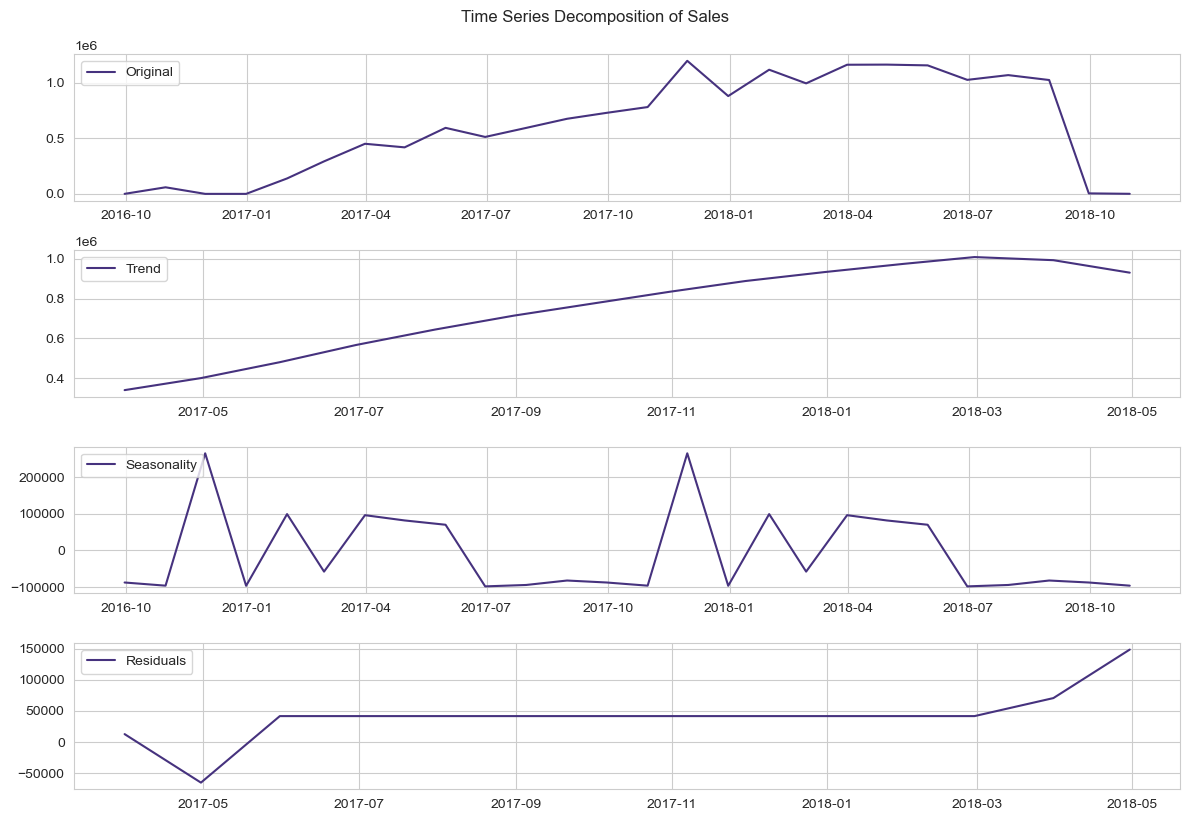

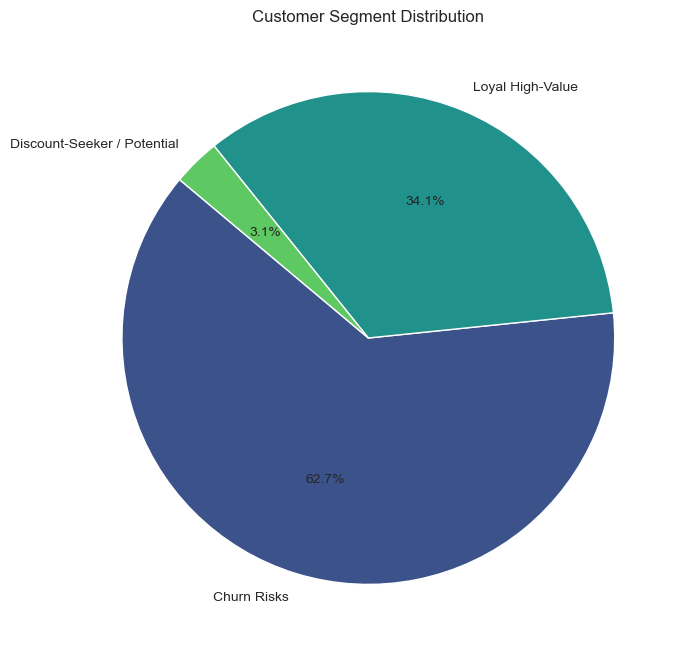

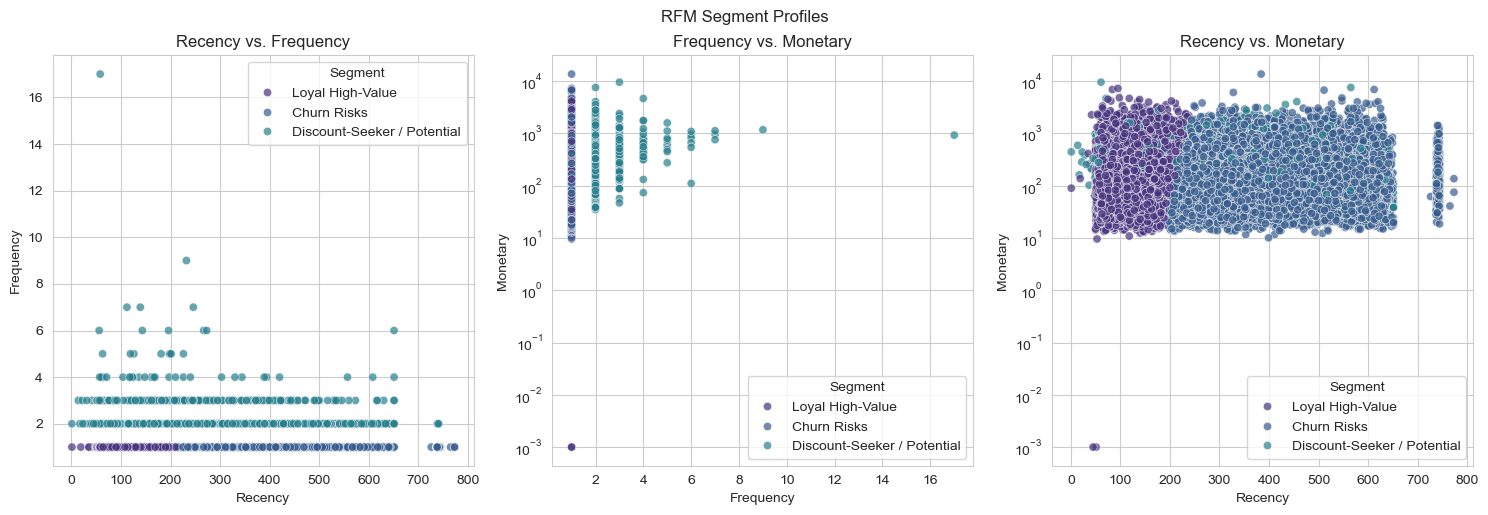

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Data Loading and Preparation (from previous steps) ---
orders_df = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/orders.csv')
customers_df = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/customers.csv')
payments_df = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/payments.csv')

# Merge dataframes
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id')
full_df = pd.merge(orders_customers_df, payments_df, on='order_id')

# Convert to datetime
full_df['order_purchase_timestamp'] = pd.to_datetime(full_df['order_purchase_timestamp'])

# --- Visualization 1: Time Series Decomposition ---
# Aggregate sales to monthly level
monthly_sales = full_df.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='M'))['payment_value'].sum()

# Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.suptitle('Time Series Decomposition of Sales', y=1.02)
plt.savefig('sales_decomposition.png')


# --- RFM and Segmentation (from previous steps) ---
snapshot_date = full_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)
rfm_df = full_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
})
rfm_df.rename(columns={'order_purchase_timestamp': 'Recency',
                       'order_id': 'Frequency',
                       'payment_value': 'Monetary'}, inplace=True)

# Preprocessing
rfm_df['Recency'] = rfm_df['Recency'].replace(0, 0.001)
rfm_df['Frequency'] = rfm_df['Frequency'].replace(0, 0.001)
rfm_df['Monetary'] = rfm_df['Monetary'].replace(0, 0.001)
rfm_log = np.log(rfm_df)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(rfm_scaled)
rfm_df['Cluster'] = kmeans.labels_

# Labeling
cluster_summary = rfm_df.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean'})
loyal_cluster = cluster_summary.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=[True, False, False]).index[0]
churn_cluster = cluster_summary.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=[False, True, True]).index[0]
middle_cluster = list(set(cluster_summary.index) - {loyal_cluster, churn_cluster})[0]
label_map = {
    loyal_cluster: 'Loyal High-Value',
    churn_cluster: 'Churn Risks',
    middle_cluster: 'Discount-Seeker / Potential'
}
rfm_df['Segment'] = rfm_df['Cluster'].map(label_map)


# --- Visualization 2: Customer Segment Distribution ---
segment_counts = rfm_df['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=3))
plt.title('Customer Segment Distribution')
plt.ylabel('') # Hides the 'Segment' label on the y-axis
plt.savefig('segment_pie_chart.png')


# --- Visualization 3: RFM Segment Profiles (Scatter Plots) ---
plt.figure(figsize=(15, 5))
sns.set_palette("viridis")

# Plot 1: Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Segment', alpha=0.7)
plt.title('Recency vs. Frequency')

# Plot 2: Frequency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary', hue='Segment', alpha=0.7)
plt.title('Frequency vs. Monetary')
plt.yscale('log') # Use log scale for better visualization of monetary values

# Plot 3: Recency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Segment', alpha=0.7)
plt.title('Recency vs. Monetary')
plt.yscale('log') # Use log scale

plt.tight_layout()
plt.suptitle('RFM Segment Profiles', y=1.02)
plt.savefig('rfm_scatter_plots.png')

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Model Performance ---
Accuracy: 0.9951
Precision: 0.0000
Recall: 0.0000

Confusion Matrix:
[[33630     0]
 [  165     0]]


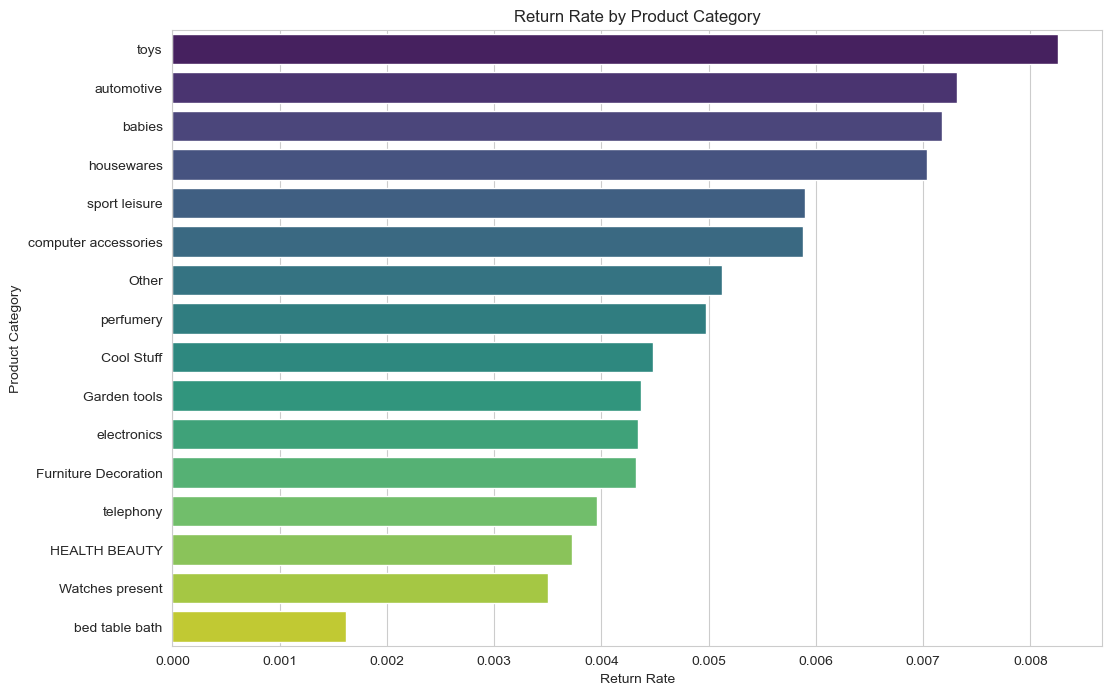

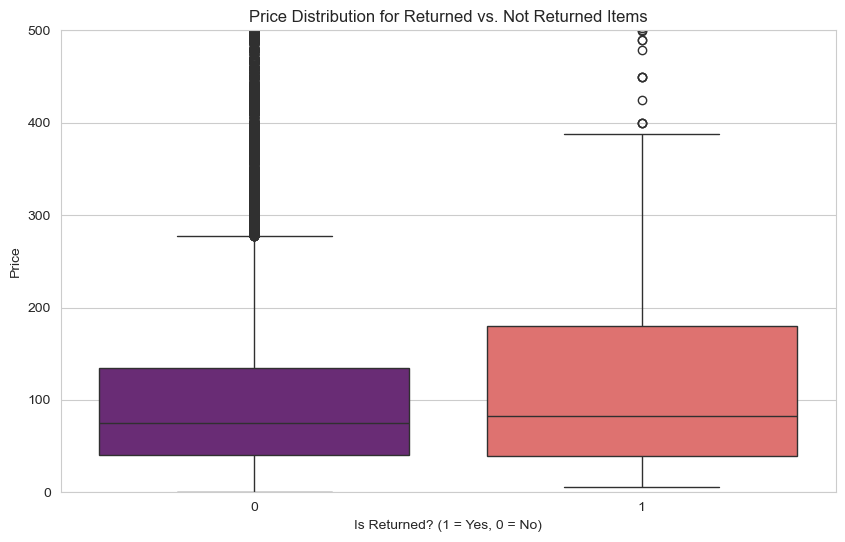

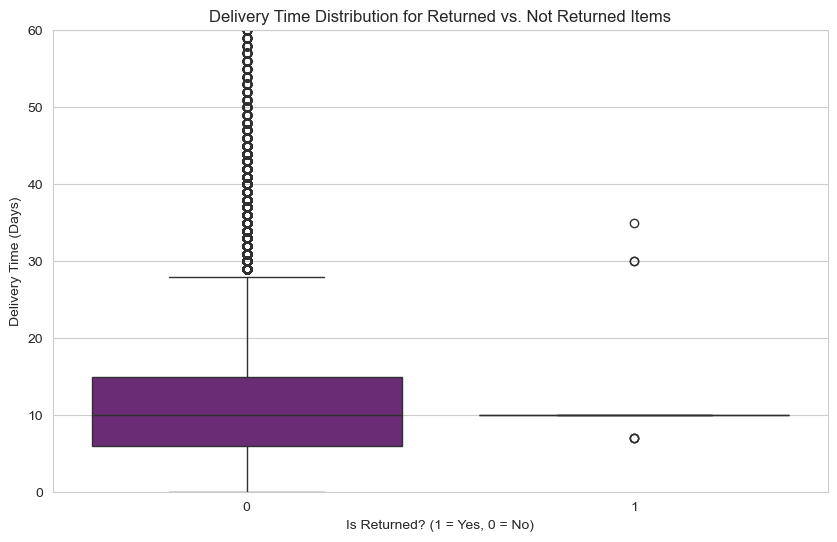

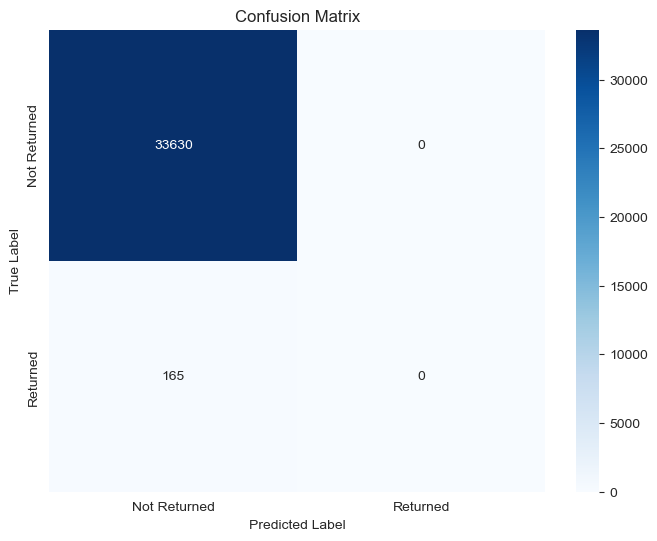

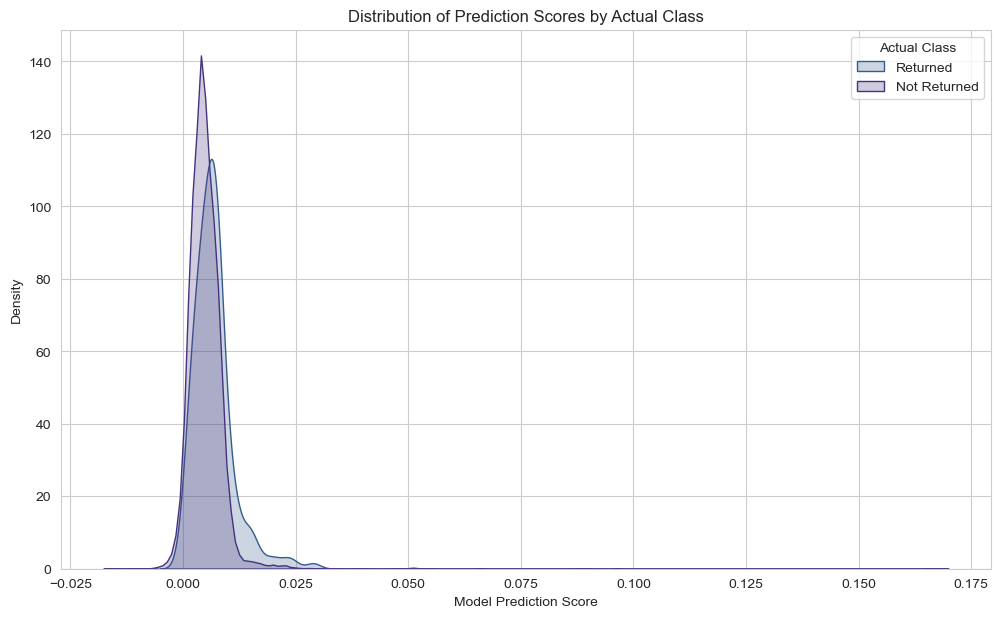

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 1. Data Loading and Merging ---
try:
    orders = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/orders.csv')
    order_items = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/order_items.csv')
    products = pd.read_csv('/Users/akshatgaur/Documents/WSQUBE/CapStone/Ecommerce/products.csv')
except FileNotFoundError:
    print("Make sure all required CSV files are in the directory.")
    exit()

# Rename product category column to be consistent
products.rename(columns={'product category': 'product_category_name'}, inplace=True)
df = pd.merge(orders, order_items, on='order_id')
df = pd.merge(df, products, on='product_id')

# --- 2. Feature Engineering and Data Cleaning ---

# Define the target variable 'is_returned'
df['is_returned'] = df['order_status'].apply(lambda x: 1 if x in ['canceled', 'unavailable'] else 0)

# Calculate delivery time
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# *** FIX: Handle missing values in ALL feature columns to prevent errors ***
# This resolves the `ValueError`
df['delivery_time'] = df['delivery_time'].fillna(df['delivery_time'].median())
df['product_category_name'] = df['product_category_name'].fillna('Unknown')
df['price'] = df['price'].fillna(df['price'].median())
df['freight_value'] = df['freight_value'].fillna(df['freight_value'].median())
df['product_photos_qty'] = df['product_photos_qty'].fillna(df['product_photos_qty'].median())


# --- 3. Exploratory Data Visualizations ---

# A. Return Rate by Product Category
top_categories = df['product_category_name'].value_counts().nlargest(15).index
df_vis = df.copy()
df_vis['category_agg'] = df_vis['product_category_name'].apply(lambda x: x if x in top_categories else 'Other')
category_return_rate = df_vis.groupby('category_agg')['is_returned'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
# *** FIX: Address the seaborn FutureWarning by assigning y to hue ***
sns.barplot(x=category_return_rate.values, y=category_return_rate.index, hue=category_return_rate.index, dodge=False, palette='viridis', legend=False)
plt.title('Return Rate by Product Category')
plt.xlabel('Return Rate')
plt.ylabel('Product Category')
plt.savefig('return_rate_by_category.png')

# B. Price Distribution for Returned vs. Non-Returned
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_returned', y='price', hue='is_returned', dodge=False, palette='magma', legend=False)
plt.title('Price Distribution for Returned vs. Not Returned Items')
plt.xlabel('Is Returned? (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.ylim(0, 500)
plt.savefig('price_distribution_returns.png')

# C. Delivery Time Distribution for Returned vs. Non-Returned
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_returned', y='delivery_time', hue='is_returned', dodge=False, palette='magma', legend=False)
plt.title('Delivery Time Distribution for Returned vs. Not Returned Items')
plt.xlabel('Is Returned? (1 = Yes, 0 = No)')
plt.ylabel('Delivery Time (Days)')
plt.ylim(0, 60)
plt.savefig('delivery_time_distribution_returns.png')

# --- 4. Model Building (Using Linear Regression) ---

features = ['price', 'delivery_time', 'freight_value', 'product_photos_qty', 'product_category_name']
target = 'is_returned'

X = df[features]
y = df[target]

# Define preprocessing steps
numeric_features = ['price', 'delivery_time', 'freight_value', 'product_photos_qty']
categorical_features = ['product_category_name']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the full pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the model
model_pipeline.fit(X_train, y_train)

# --- 5. Prediction and Evaluation ---
y_pred_continuous = model_pipeline.predict(X_test)
y_pred_class = (y_pred_continuous > 0.5).astype(int)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print("--- Model Performance ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Returned', 'Returned'],
            yticklabels=['Not Returned', 'Returned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


# Create a DataFrame for easy plotting with seaborn
results_df = pd.DataFrame({'y_test': y_test, 'y_pred_continuous': y_pred_continuous})

# Plot the distribution of prediction scores
plt.figure(figsize=(12, 7))
sns.kdeplot(data=results_df, x='y_pred_continuous', hue='y_test', fill=True, common_norm=False)
plt.title('Distribution of Prediction Scores by Actual Class')
plt.xlabel('Model Prediction Score')
plt.ylabel('Density')
plt.legend(title='Actual Class', labels=['Returned', 'Not Returned'])
plt.savefig('prediction_score_distribution.png')

Key Insights & Recommendations

This summary provides a high-level overview of the findings from the forecasting, customer segmentation, and return prediction models.

1. On Business Growth and Seasonality 📈

Insight: Walmart business is on a clear upward growth trend in both sales and new customer acquisition. Sales are highly seasonal, with a major peak period consistently occurring at the beginning of the year (January-February).

Recommendation:

Capitalize on Peak Season: Prepare for the early-year sales surge. Increase your inventory, scale up your marketing campaigns, and ensure your customer support is fully staffed in the months leading up to and during this period to maximize revenue and customer satisfaction.

2. On Customer Behavior and Segmentation 👥

Insight: Walmart customer base is divided into three distinct groups. A concerningly large segment (over 60,000 customers) are "Churn Risks" who have not purchased in a long time. Your most valuable group are the "Loyal High-Value" customers, who buy recently. A small but frequent-buying group of "Discount-Seekers / Potential" also exists.

Recommendations:

Re-engage Churn Risks: Launch targeted "win-back" campaigns for the largest customer segment. Use email marketing with special offers or surveys to understand their inactivity and entice them to return.

Nurture Loyal Customers: Implement a loyalty program or offer exclusive perks to your "Loyal High-Value" customers to foster retention and encourage repeat business.

Convert Potential Customers: Target the "Discount-Seeker" group with new product announcements and limited-time offers to increase their purchase recency and convert them into loyal buyers.

3. On Product Returns 📦

Insight: Predicting which items will be returned is very difficult with the current data. The model showed that factors like price and delivery time are not strong predictors of a return. However, we did identify that certain product categories, such as "auto," have a slightly higher tendency to be returned.

Recommendations:

Investigate High-Return Products: Manually review products in the categories with the highest return rates. Look for common issues like inaccurate product descriptions, sizing problems, or quality concerns that can be fixed.

Enhance Data for Future Models: To build a better prediction model in the future, you need more data. Consider collecting information on product ratings, detailed customer reviews, and specific return reasons. This will provide much clearer signals for predicting returns.